In [105]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
seednumber = rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

    

In [106]:
import pandas as pd

datapath = "/Users/tuanle/DynamicPricing/Data/"

Ha_Noi = pd.read_csv(datapath+"HaNoi_1month_LW_WeatherTest.csv")
Ha_Noi.accept_rate = Ha_Noi.accept_rate.shift(-1)
# Ha_Noi2 = Ha_Noi2.drop("request", axis = 1)
Ha_Noi = Ha_Noi.dropna(subset = ["longwait_percent1"])
Ha_Noi = Ha_Noi.dropna(subset=["accept_rate"])
df2 = pd.DataFrame(Ha_Noi)

 

# threshold for request
# df2 = df2.drop(df2[(df2.request < 15)].index)
#Dong_Da.describe()

In [107]:
corr_matrix = Ha_Noi.corr()
corr_matrix["accept_rate"].sort_values(ascending=False)

accept_rate                         1.000000
request                            -0.197986
long_waiting                       -0.619737
longwait_percent1                  -0.732090
Weather Weight_Longwait_percent4   -0.735139
Weather Weight_Longwait_percent2   -0.735758
longwait_percent4                  -0.739608
longwait_percent2                  -0.740427
longwait_percent3                  -0.741485
Name: accept_rate, dtype: float64

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

train_set, test_set = train_test_split(Ha_Noi, test_size=0.2, random_state= random.randint(40, 200))
Xtrain = train_set['longwait_percent2'].reshape(-1,1)
Ytrain = train_set['accept_rate'].reshape(-1,1)

Xtest = test_set['longwait_percent2'].reshape(-1,1)
Ytest = test_set['accept_rate'].reshape(-1,1)






# Linear Regression - ML model

In [109]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = model.fit(Xtrain, Ytrain)


In [110]:
Accept_rate_prediction = model.predict(Xtest)
Accept_rate_train  = model.predict(Xtrain)

# Accept_rate_prediction2 = model2.predict(Xtest2)
# Accept_rate_train2 = model2.predict(Xtrain2)


In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_mse = mean_squared_error(Ytest, Accept_rate_prediction)
lin_rmse = np.sqrt(lin_mse) #taking square root of MSE converts the units back to the original units of the output variable

lin_mae = mean_absolute_error(Ytest, Accept_rate_prediction)
print("Mean Square Error:\t",lin_rmse)
# print("Mean Absolute Error:\t", lin_mae)

lin_reg = LinearRegression()
#Evaluate Lin-Reg algo on the whole training set by cross-validation
scores2 = cross_val_score(lin_reg, Xtrain, Ytrain.ravel(), scoring = "neg_mean_squared_error", cv = 100)
linreg_rmse_scores2 = np.sqrt(-scores2)

#Evaluate Lin-Reg algo on the whole test set by cross-validation
scores4 = cross_val_score(lin_reg, Xtest, Ytest.ravel(), scoring = "neg_mean_squared_error", cv = 100)
linreg_rmse_scores4 = np.sqrt(-scores4)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard:", scores.std())
    print("Max:", scores.max())
    print("Min:", scores.min())

# display_scores(-scores2)
display_scores(-scores4)

r_squared = r2_score(Ytest, Accept_rate_prediction) #built-in formula for R^2 
print("R^2:\t", r_squared) 

adjusted_Rsquared = 1 - (1-r_squared)*(len(Xtest)-1)/(len(Xtest)-1-1) #formula for adjusted R^2 by theory
print("Adjusted R^2:\t", adjusted_Rsquared) #correct the error when adding more and more independent variables to the linear regression model


# lin_mse = mean_squared_error(Ytrain, Accept_rate_train)
# lin_rmse = np.sqrt(lin_mse)
# print("Mean Squred Error_train:\t", lin_rmse)

Mean Square Error:	 0.0644719635398
Scores: [  5.15733719e-03   4.78153319e-03   3.02825401e-03   1.52545475e-02
   4.98719719e-03   3.01347880e-03   1.35351816e-03   6.13994628e-04
   1.80402652e-02   2.88375846e-02   4.59630408e-03   2.09598522e-02
   5.22349239e-03   6.84216916e-03   2.04995143e-03   9.92184488e-04
   1.07493893e-02   6.12274993e-03   2.36841833e-03   1.11329026e-03
   1.19086530e-03   7.55502837e-03   1.06233883e-02   1.31986529e-03
   2.35442732e-04   8.85893954e-03   8.02625800e-03   1.23131575e-02
   1.99752358e-03   4.97627862e-04   1.51181356e-03   6.13724063e-03
   1.07362761e-02   9.71944501e-04   6.16450963e-03   4.44720703e-03
   5.01886806e-03   3.58832819e-03   4.22371628e-04   9.00297353e-03
   1.19618864e-03   8.32294248e-04   6.26315921e-06   7.73365107e-04
   1.11358970e-03   9.28926551e-03   6.61884574e-04   1.16802194e-04
   5.92302722e-03   1.61494722e-03   1.66231943e-03   2.25248427e-03
   8.85541099e-03   2.10256826e-03   2.82629469e-04   5.422

# Plot of RMSE errors when testing our models on training set vs test set

Average RMSE on the training set is: 0.071
Average RMSE on the test set is: 0.066


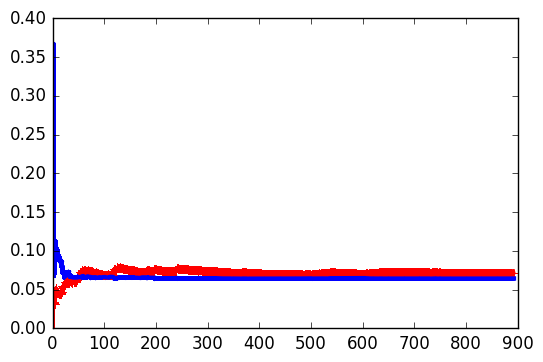

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def plot_learning_curves(model):
    train_errors, test_errors = [], []
    for m in range(1, len(Xtrain)):
        model.fit(Xtrain[:m], Ytrain[:m])
        Ytrain_predict = model.predict(Xtrain[:m])
        Ytest_predict = model.predict(Xtest)
        train_errors.append(mean_squared_error(Ytrain_predict, Ytrain[:m]))
        test_errors.append(mean_squared_error(Ytest_predict, Ytest))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
        plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="validation set")
    print("Average RMSE on the training set is: %.3f" %np.mean(np.sqrt(train_errors)))
    print("Average RMSE on the test set is: %.3f" %np.mean(np.sqrt(test_errors)))

# def plot_learning_curves2(model):   
#     train_errors2, test_errors2 = [], []
#     for n in range(1, len(Xtrain)):
#         model.fit(Xtrain2[:n], Ytrain[:n])
#         Ytrain_predict2 = model.predict(Xtrain2[:n])
#         Ytest_predict2 = model.predict(Xtest2)
#         train_errors2.append(mean_squared_error(Ytrain_predict2, Ytrain[:n]))
#         test_errors2.append(mean_squared_error(Ytest_predict2, Ytest))
#         plt.plot(np.sqrt(train_errors2), "g-+", linewidth=2, label="training set")
#         plt.plot(np.sqrt(test_errors2), "o-", linewidth=3, label="validation set")
#     print("Average RMSE on the training set is: %.3f" %np.mean(np.sqrt(train_errors2)))
#     print("Average RMSE on the test set is: %.3f" %np.mean(np.sqrt(test_errors2)))
        

polynomial_regression = Pipeline((("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                                  ("sgd_reg", LinearRegression()),
    ))

        
lin_reg = LinearRegression()
plot_learning_curves(lin_reg)








In [115]:
from sklearn.externals import joblib
filename = 'my_model.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xtest, Ytest) #R^2 result
print(result)

0.645674560557
